In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
f_birth=pd.read_csv(r'D:\Tejaswini\femal_birth_ca.csv',index_col=[0],parse_dates=[0],squeeze=True)
f_birth.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [4]:
f_birth=pd.read_csv(r'D:\Tejaswini\femal_birth_ca.csv',index_col=[0],parse_dates=[0])
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [5]:
type(f_birth)

pandas.core.frame.DataFrame

In [6]:
series_value=f_birth.values

In [7]:
type(series_value)

numpy.ndarray

In [8]:
f_birth.size

365

In [9]:
f_birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [10]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


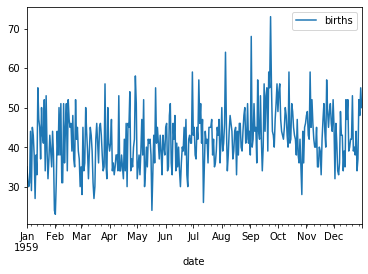

In [11]:
f_birth.plot()

In [12]:
f_birth_mean=f_birth.rolling(window=30).mean()

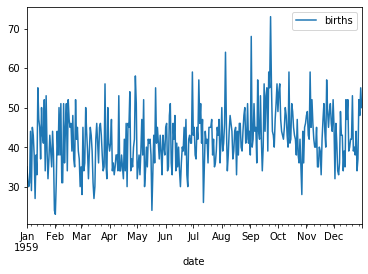

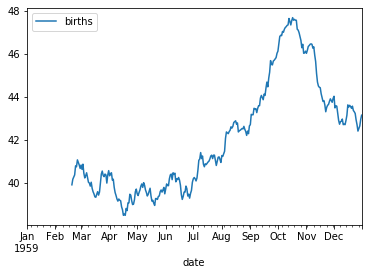

In [31]:
f_birth.plot()
f_birth_mean.plot()

In [13]:
birth_df=pd.concat([f_birth,f_birth.shift(1)],axis=1)

In [14]:
birth_df.head()

,births,births
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [15]:
birth_df.columns=['Actual_birth','Forcast_birth']

In [23]:
birth_df.tail()


,Actual_birth,Forcast_birth
date,,
1959-12-27,37,34.0
1959-12-28,52,37.0
1959-12-29,48,52.0
1959-12-30,55,48.0
1959-12-31,50,55.0


In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np


In [19]:
birth_test=birth_df[1:]

In [21]:
birth_error=mean_squared_error(birth_test.Actual_birth,birth_test.Forcast_birth)

In [22]:
birth_error

84.22252747252747

In [24]:
np.sqrt(birth_error)

9.177283229394606

In [ ]:
ARIMA-Autoregressive(p) Interated(d) Moving average(q)

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

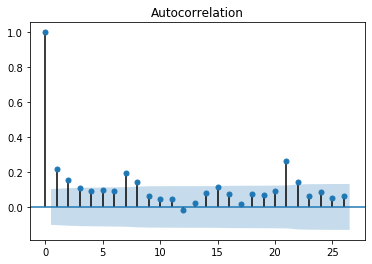

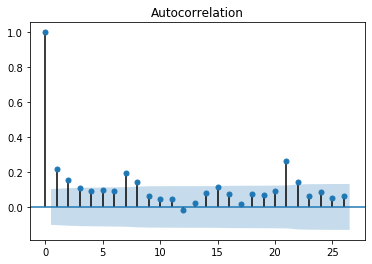

In [27]:
plot_acf(f_birth)

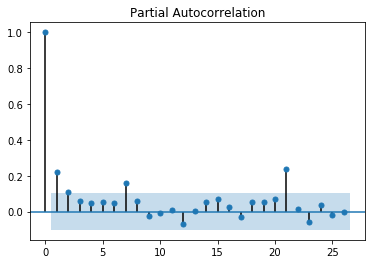

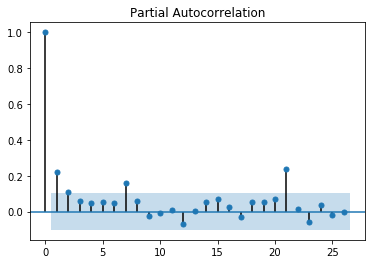

In [28]:
plot_pacf(f_birth)

In [30]:
f_birth.size

365

In [32]:
birth_train=f_birth[0:330]
birth_test=f_birth[330:365]

In [33]:
from statsmodels.tsa.arima_model import ARIMA

In [80]:
birth_model=ARIMA(birth_train ,order=(2,1,3))

C:\Users\mahen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\mahen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [81]:
birth_model_fit=birth_model.fit()

In [82]:
birth_model_fit.aic

2230.9483020110597

In [83]:
birth_forecast=birth_model_fit.forecast(steps=35)[0]

In [84]:
birth_forecast

array([45.30341841, 46.30963184, 43.6492579 , 44.59211255, 46.49620657,
       44.3430722 , 44.08983339, 46.34324752, 45.07481089, 43.88102846,
       45.95168673, 45.69518174, 43.97387685, 45.456438  , 46.10321092,
       44.31115666, 44.99213514, 46.2596975 , 44.79320291, 44.66459181,
       46.18532829, 45.30608329, 44.53309712, 45.94638847, 45.74814696,
       44.60551557, 45.63315184, 46.04957818, 44.84511559, 45.33674888,
       46.18195906, 45.18573858, 45.12967563, 46.15746209, 45.55070932])

In [85]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

6.859841578268829